# Decision Tree Classification in Python

## Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


## Loading Data

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function.

You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
#on peut lire le fichier a partir de lien : RAW 
#pima = pd.read_csv("https://raw.githubusercontent.com/nevermind78/DM/master/TP4/diabetes.csv", header=None, names=col_names)

In [7]:
pima.drop(pima.index[0],axis=0,inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


### The output should be :
![alt text](pima.png)


### Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Remarque 
<font color="blue"> We can use the **cross validation** to better generalize the model </font>

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
> ### <font color='red'> Remarque </font>:

>Evaluation Measures for Classification :

>- confusion matrix
>- Accuracy
>- Recall
>- Precision
>- F1 Score
>- ROC Curve 

> Evaluation Measures for Classification :

>- Mean absolute error (MAE)
>- Root mean squared error (RMSE)
>- Relative absolute error (RAE)
>- Relative squared error (RSE)
>- Coefficient of determination (CoD)ou (R²) 

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


> ### <font color='red'> Remarque </font>:

> Since the splitTing dataset is **random**, we will not always have the same accuracy value.


>Here are the different values found
>- Accuracy: 0.6753246753246753 
>- Accuracy: 0.6839826839826845
>- Accuracy: 0.6796536796536796

>We can use the **cross validation** to better generalize the model

## Cross validation

In [12]:
# l'enraînement avec cross-validation

#n_jobs = -1 signifie que le calcul sera distribué sur tous les CPU de l'ordinateur.
# K-fold cross-validation et GridSearchCV
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

pipelines = []
params = []
names = []

# ajouter DecisionTreeClassifier
pipelines.append(Pipeline([('clf', DecisionTreeClassifier())])) 
params.append({'clf__max_depth':np.linspace(1, 2, 3)})
names.append('DecisionTreeClassifier')


def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_obj.fit(X,y)  
    print(name, 'accuracy', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # training sur tout training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

DecisionTreeClassifier accuracy 0.7189165801315334


### Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

`pip install graphviz`

`pip install pydotplus`

`export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.`

In [45]:
!pip install graphviz

In [16]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=4b808ad3e6fc502ddcf0102360b2174965ff0e3afde0893ac09785e03e618237
  Stored in directory: c:\users\client\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [9]:
pip install --upgrade scikit-learn==0.20.3

In [ ]:
conda install graphviz

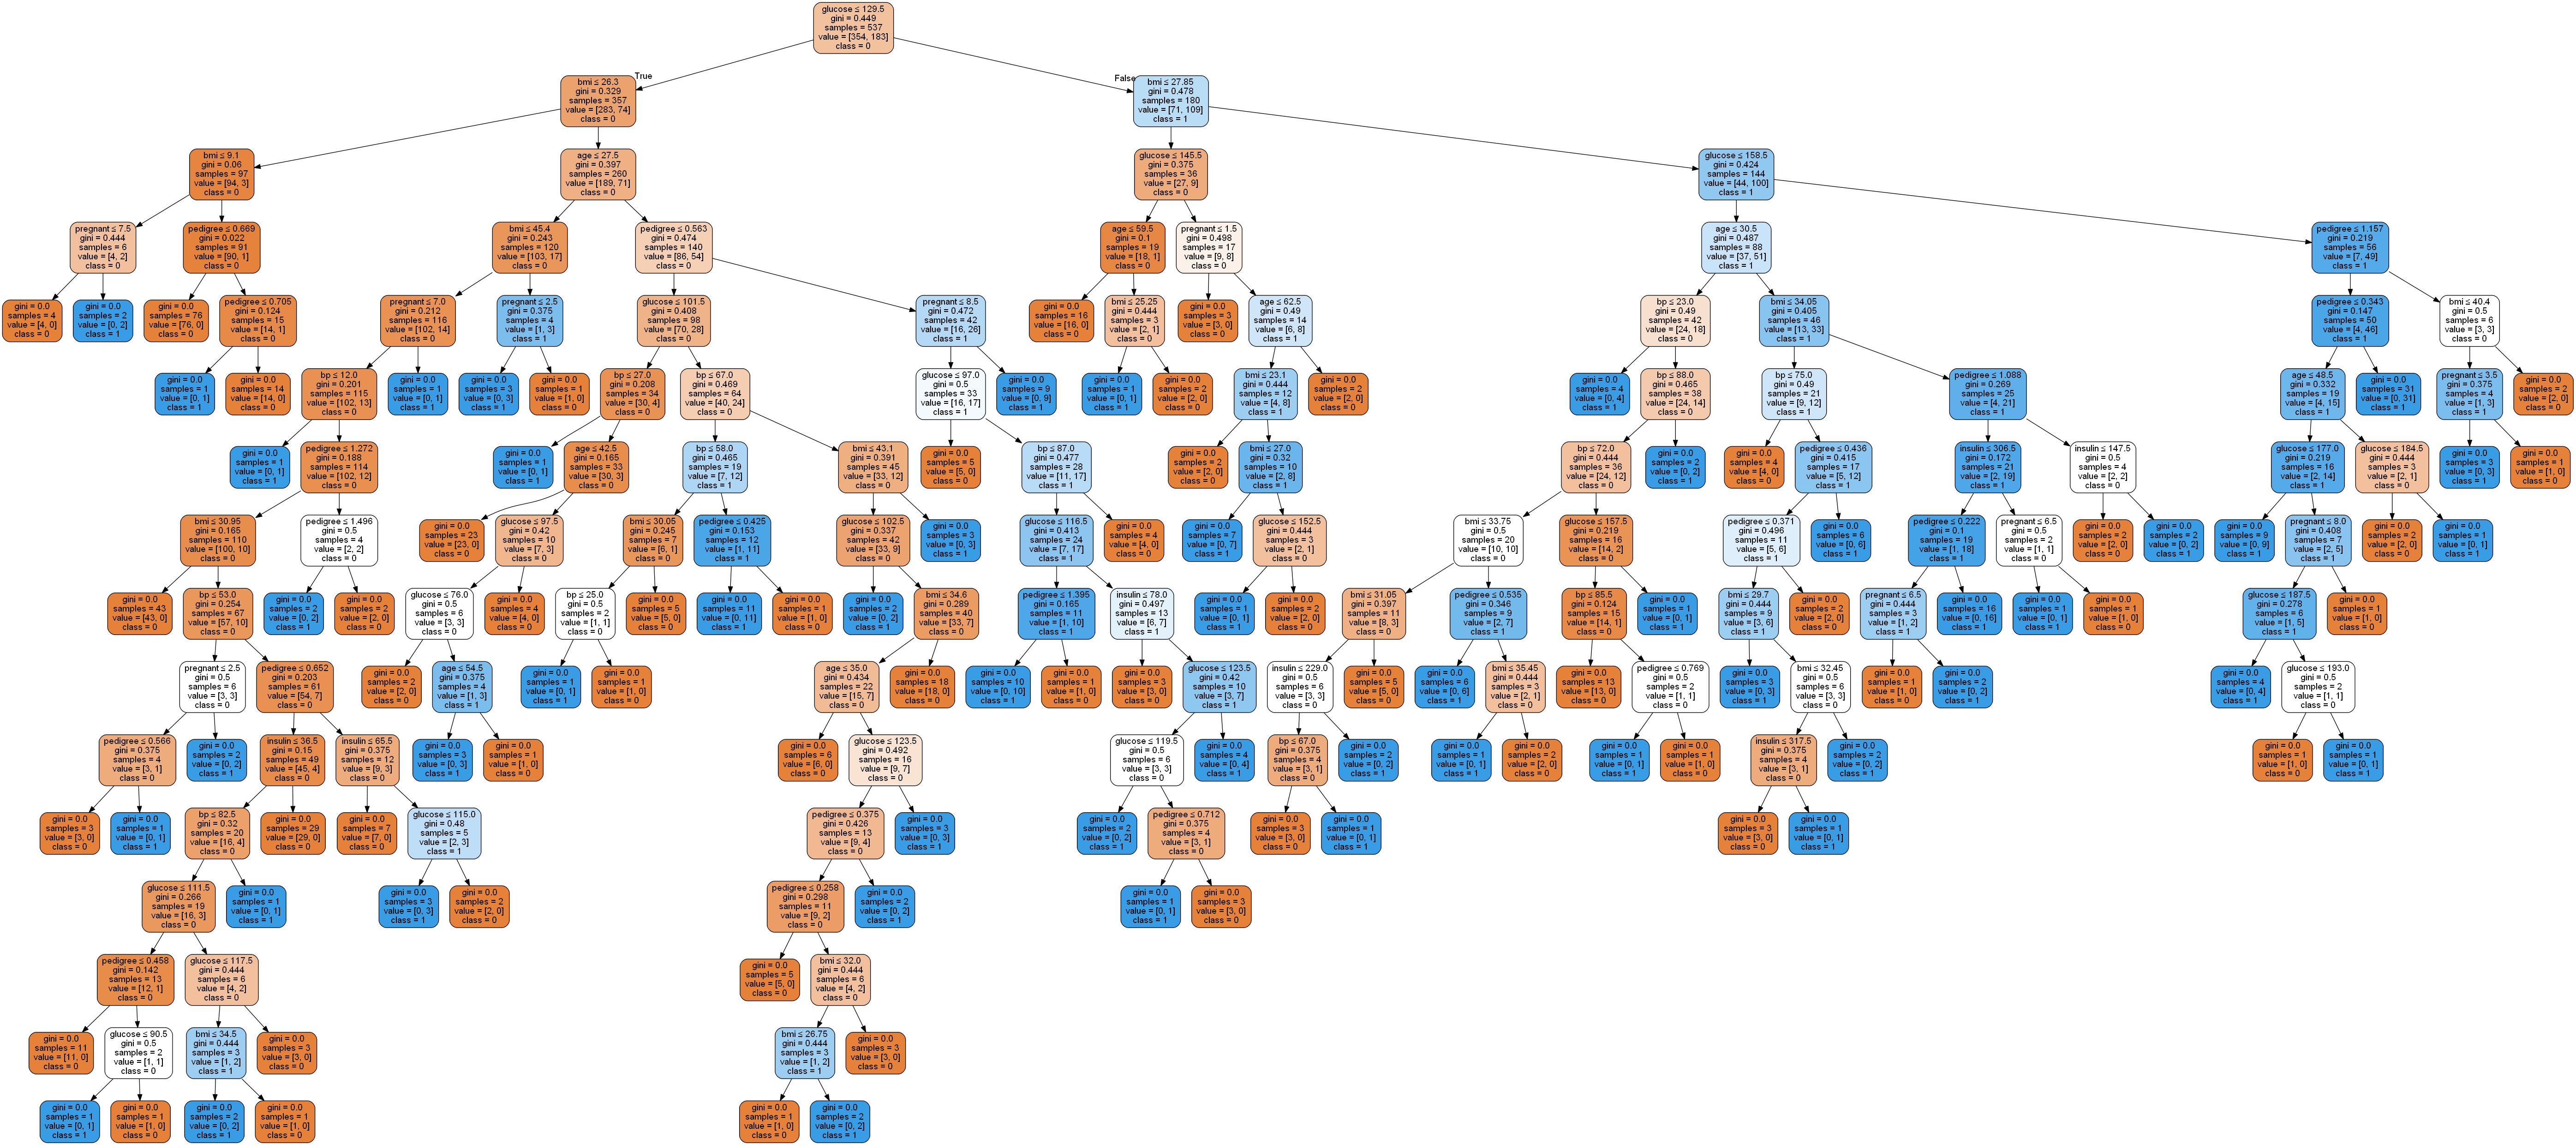

In [11]:
#from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

<font color='red'>
we get a tree with several levels so we can have a risk of overfitting or other problems
</font>

### Optimizing Decision Tree Performance
* **criterion :** `optional (default=”gini”) or Choose attribute selection measure`: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* **splitter :** `string, optional (default=”best”) or Split Strategy`: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* **max_depth** : `int or None, optional (default=None) or Maximum Depth of a Tree`: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Accuracy: 0.7705627705627706

### Visualizing Decision Trees

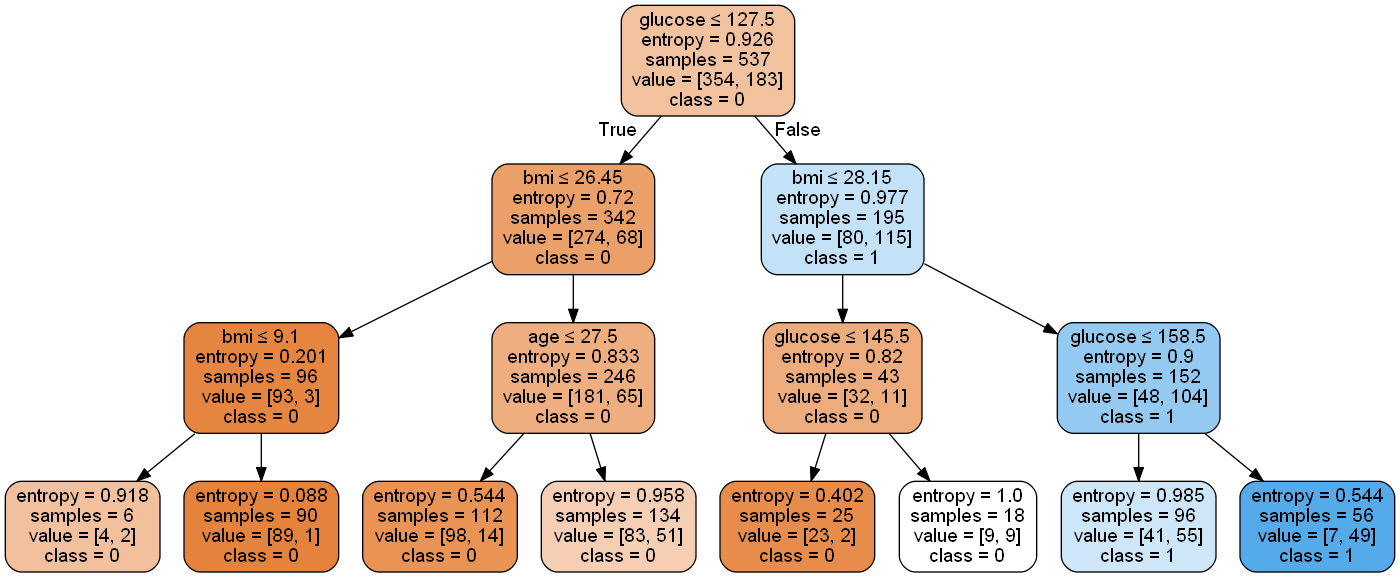

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Pros:

>1.   Easy to understand and visualize.
>2.   Little data preparation (Scaling, etc.).
>3.   The cost of using trees is logarithmic.
>4.   Capable of dealing with multi-class problems.
>5.   White box :the result is easy to conceptualize / visualize.
>6.   Able to handle both numerical and categorical data
>7.   Robust against co-linearity, particularly boosting
>8.   Performs well with large datasets

### Cons
>1.     `Over-fitting`: trees sometimes are too complex ⇒ badgeneralization. must Choose good values for **max depth** 
>2.     Trees sometimes `unbalanced` : Adjust the database upstream to avoid that one class largely dominates the others 

### Conclusion

**Decision tree learning** is a method commonly used in data mining The goal is to **create a model** that **predicts** the value of a target variable based on several input variables.

### use cases of decision tree : 

Many data mining **provide implementations** of one or more decision tree algorithms.

Decision trees are very much useful to **diagnose a patient problem** by the physicians.

Decision tree classifiers are used extensively for **diagnosis of breast tumour** in ultrasonic images, ovarian cancer and **heart sound diagnosis**.


**In finance**, forecasting future outcomes and assigning probabilities to those outcomes

Binomial option **pricing predictions** and **real option analysis**

### Why use decision trees?
One of the best and mostly used **supervised learning** methods are tree-based algorithms. They empower predictive modeling with *higher accuracy*, *better stability* and provide *ease of interpretation*


> At the end we can mention that 
Decision Tree is not only used with `classification` problemes but also with `réegression ` problemes
 > - Regression (continuous target variable).
 > - Classification (discrete target variable)